# Proyecto de Taller de Ciencias de Datos: Trending YouTube Video Statistics

## Contexto
Youtube mantiene una lista con videos en tendencia de la plataforma, denominada Trending. Su objetivo es que los usuarios descubran nuevos videos que podrían disfrutar. Alguna tendencias son predecibles o inesperadas.La lista se actualiza cada 15 minutos aproximadamente.

¿Qué determina si un video se mostrará en Tendencias?
 - Las vistas
 - La rapidez con que el video genera vistas (es decir, su popularidad)
 - El lugar del que provienen las vistas (incluidos los lugares fuera de YouTube)
 - La antigüedad del video
 - Cuál es el rendimiento del video en comparación con otros videos subidos recientes del mismo canal
 - Entre otros…


## Descripción de Data Set
Consiste en meses de datos diarios de vídeo tendencias en Youtube (14-11-2017 al 14-06-18).

Incluye datos provenientes de varios países.

Para este proyecto se han escogido los datos de Estados Unidos. Los datos incluyen:
 - Título del vídeo
 - Título del canal
 - Hora de publicación
 - Etiquetas (tags)
 - Cantidad de vistas
 - Cantidad de "Me gusta" 
 - Cantidad de "No me gusta"
 - Descripción del video 
 - Recuento de comentarios.
 
Los datos también incluyen un campo category_id asociado a un archivo JSON con datos de las categorías.


## Metodología
Se escoge la metodología CRISP-DM, porque:
 - Integra todas las tareas necesarias en los proyectos de minería de datos.
 - Proporciona descripciones de las fases y tareas de un proyecto.
 - Es flexible y se pueden personalizar fácilmente.
 - Se enfoca en el proceso de análisis de datos.
 - Permite retroceder y avanzar en diferentes fases.


## Tareas
Fase 1. Business Understanding: 
 - Definir las necesidades del cliente
 - Comprender los objetivos del proyecto
 - Definir problema 
 
Fase 2. Data Understanding:
 - Extraer datos iniciales
 - Revisión preliminar sobre los datos
 - Análisis de los datos
 
Fase 3. Data Preparation: 
 - Seleccionar datos
 - Limpieza de datos
 - Construir datos
 - Integrar datos
 - Formatear datos
 - Generar reportes y resumenes de los datos 
 
Fase 4. Modeling:
 - Definir y aplicar técnicas para el modelado del problema
 - Según las técnicas, volver a la Fase 3, si es necesario
 
Fase 5. Evaluation:
 - Obtener resultados
 - Evaluar los modelos 
 - Revisar los pasos ejecutados
 - Comparar modelo con los objetivos de negocio
 
Fase 6. Deployment:  
 - Presentar a cliente el proyecto en su última etapa
 - Esperar retroalimentación del cliente
 - Entregar proyecto


## Fase 1. Business Understanding

#### Objetivo: Analizar qué factores afectan a la popularidad de un vídeo de YouTube

#### Definición de necesidades del cliente

YouTube es una plataforma que va en aumento para negocios como la publicidad o la gestión de marcas. Sin embargo, es complejo conocer los factores de popularidad de un vídeo y predecir su llegada a tendencias. El conocimiento de estos factores, permitiría mejorar la toma de decisiones para la creación de contenido para un producto o marca comercial

#### Definir problema 

No hay claridad de los factores que afectan a la popularidad de un vídeo, esto pueden ser variados, como el número de vistas, número de comentarios, numero de likes, numero de dislikes, tipo de contenido, hora de publicación, entre otros. Estos elementos, brindarían la posibilidad de predecir la popularidad de un video para su aparición en tendencias de Youtube y en el mejor de los casos, volverse viral.

## Fase 2. Data Understanding

### Extracción de datos: se importan datos del data set "Trending YouTube Video Statistics" con información estadística de videos   de Estados Unidos

In [1]:
import pandas as pd
import numpy as np
USvideos = pd.read_csv("USvideos.csv")
USvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


#### Descripción de columnas

 - video_id: contiene un código alfanumérico para la identificación del vídeo.
 - trending_date: contiene la fecha en que el vídeo empezó a ser tendencia en formato YYDDMM.
 - title: contiene el título del vídeo. Algunos contienen caracteres no ascii y emojis.
 - channel_title: contiene el título del canal.
 - category_id: contiene el número de identificación de cada categoría. Es necesario coincidir el id con los datos de las  categorías en el archivo JSON.
 - publish_time: contiene la fecha y la hora de publicación del vídeo. Tiene un formato diferente al de la fecha de tendencia.
 - tags: contiene las etiquetas en una cadena larga
 - views, likes, dislikes, comment_count: contiene valores numéricos.
 - thumbnail_link: contiene la url de la imagen de la miniatura.
 - comments_disabled, ratings_disabled, video_error_or_removed: contiene valores booleanos.
 - description: contiene la descripción del vídeo en forma de cadena. Algunas contienen caracteres no ascii, emojis y urls.


### Extracción de datos sobre categorías en archivo JSON

#### Extracción de id y nombre de las categorías

In [2]:
import json
USCategory = pd.read_json("US_category_id.json")

indexId = USCategory["items"].to_json(orient="index")
IdCategory=pd.read_json(indexId, orient="index")
IdCategory=IdCategory

indexName = IdCategory["snippet"].to_json(orient="index")
nameCategory = pd.read_json(indexName, orient="index")
data_category={"id":IdCategory["id"],"category_name":nameCategory["title"]}
USCategory = pd.DataFrame(data_category)
USCategory

,id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


#### Descripción de columnas

 - id: contiene el código de la categoría
 - categoría_name: contiene el nombre de la categoría

#### Se realiza merge para agregar columna con nombre de la categoría para cada vídeo

In [3]:
USvideos=USvideos.merge(USCategory, left_on='category_id', right_on='id', how='left')
USvideos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",24,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,24,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,15,Pets & Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,22,People & Blogs
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,24,Entertainment
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,1,Film & Animation


### Reducción de memoria

#### Chequeo de los datos

In [4]:
USvideos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

#### Se almecenan las columnas para su análisis

In [5]:
cols = USvideos.columns
cols

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'id', 'category_name'],
      dtype='object')

#### Se revisan los primeros datos del data set

In [6]:
col2 = USvideos.loc[:,cols]
col2.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",24,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,23,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,24,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,Entertainment


#### Revisar los tipos de datos

In [7]:
col2.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
id                         int64
category_name             object
dtype: object

#### Chequeo de memoria usada por las columnas

In [8]:
original_mem = col2.memory_usage(deep=True)
original_mem

Index                       327592
video_id                   2784532
trending_date              2661685
title                      4628488
channel_title              2880847
category_id                 327592
publish_time               3316869
tags                      14452593
views                       327592
likes                       327592
dislikes                    327592
comment_count               327592
thumbnail_link             4217807
comments_disabled            40949
ratings_disabled             40949
video_error_or_removed       40949
description               81055436
id                          327592
category_name              2797796
dtype: int64

#### Se escojen columnas de datos númericos para cambiar el tipo de dato. Se realiza el cambio

In [9]:
col2["views"] = col2["views"].astype(np.int32)
col2["likes"] = col2["likes"].astype(np.int32)
col2["dislikes"] = col2["dislikes"].astype(np.int32)
col2["comment_count"] = col2["comment_count"].astype(np.int32)

#### Chequeo de tipo de datos "object"

In [10]:
col2.select_dtypes(include=["object"]).nunique()

video_id          6351
trending_date      205
title             6455
channel_title     2207
publish_time      6269
tags              6055
thumbnail_link    6352
description       6901
category_name       16
dtype: int64

#### Columna category_name es candidato a tipo de dato "category". Se realiza el cambio

In [11]:
col2["category_name"] = col2["category_name"].astype("category")

#### Chequeo de tipo de datos después de los cambios

In [12]:
col2.dtypes

video_id                    object
trending_date               object
title                       object
channel_title               object
category_id                  int64
publish_time                object
tags                        object
views                        int32
likes                        int32
dislikes                     int32
comment_count                int32
thumbnail_link              object
comments_disabled             bool
ratings_disabled              bool
video_error_or_removed        bool
description                 object
id                           int64
category_name             category
dtype: object

#### Revisión de la memoria después de los cambios

In [13]:
new_mem = col2.memory_usage(deep=True)
new_mem

Index                       327592
video_id                   2784532
trending_date              2661685
title                      4858227
channel_title              2894627
category_id                 327592
publish_time               3316869
tags                      15568698
views                       163796
likes                       163796
dislikes                    163796
comment_count               163796
thumbnail_link             4217807
comments_disabled            40949
ratings_disabled             40949
video_error_or_removed       40949
description               81055436
id                          327592
category_name                42611
dtype: int64

#### Razón de cambio entre la nueva cantidad de memoria y anterior a los cambios

In [14]:
new_mem / original_mem

Index                     1.000000
video_id                  1.000000
trending_date             1.000000
title                     1.049636
channel_title             1.004783
category_id               1.000000
publish_time              1.000000
tags                      1.077225
views                     0.500000
likes                     0.500000
dislikes                  0.500000
comment_count             0.500000
thumbnail_link            1.000000
comments_disabled         1.000000
ratings_disabled          1.000000
video_error_or_removed    1.000000
description               1.000000
id                        1.000000
category_name             0.015230
dtype: float64

#### Se asignan los cambios al data set

In [15]:
USvideos = col2

### Resúmenes estadísticos

#### Resumen de estadísticas del data set: conteo, promedio, desviación estándar, valor mínino, cuartiles y valor máximo en valores númericos

In [16]:
USvideos.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,40949.0,1.997243e+01,7.568327e+00,1.0,17.0,24.0,25.0,43.0
views,40949.0,2.360785e+06,7.394114e+06,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,7.426670e+04,2.288853e+05,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,3.711401e+03,2.902971e+04,0.0,202.0,631.0,1938.0,1674420.0
comment_count,40949.0,8.446804e+03,3.743049e+04,0.0,614.0,1856.0,5755.0,1361580.0
id,40949.0,1.997243e+01,7.568327e+00,1.0,17.0,24.0,25.0,43.0


### Resúmenes sobre los tipos de datos de las columnas

In [17]:
USvideos.dtypes

video_id                    object
trending_date               object
title                       object
channel_title               object
category_id                  int64
publish_time                object
tags                        object
views                        int32
likes                        int32
dislikes                     int32
comment_count                int32
thumbnail_link              object
comments_disabled             bool
ratings_disabled              bool
video_error_or_removed        bool
description                 object
id                           int64
category_name             category
dtype: object

In [18]:
USvideos.dtypes.value_counts()

object      8
int32       4
bool        3
int64       2
category    1
dtype: int64

### Cuantificar y visualizar datos continuos y categóricos

### Datos categóricos

#### Revisión de tipos "category"

In [19]:
USvideos.select_dtypes("category").columns

Index(['category_name'], dtype='object')

#### Conteo de valores unicos

In [20]:
USvideos.category_name.nunique()

16

#### Revisión de datos random 

In [21]:
USvideos.category_name.sample(5, random_state=42)

15632             Music
40759    People & Blogs
10536     Entertainment
11029     Entertainment
8202      Entertainment
Name: category_name, dtype: category
Categories (16, object): ['Autos & Vehicles', 'Comedy', 'Education', 'Entertainment', ..., 'Science & Technology', 'Shows', 'Sports', 'Travel & Events']

#### Número y porcentaje de valores perdidos

In [22]:
USvideos.category_name.isna().sum()

0

In [23]:
USvideos.category_name.isna().mean() * 100

0.0

#### Resumen de la columna

In [24]:
USvideos.category_name.value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_name, dtype: int64

#### Visualización de conteo de categorías

<AxesSubplot:>

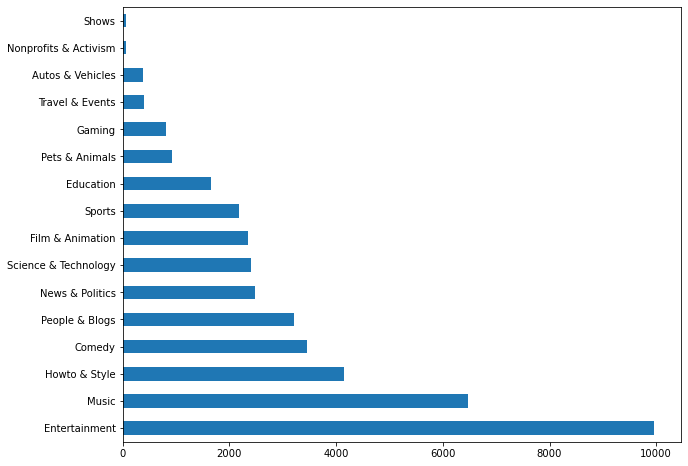

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
USvideos.category_name.value_counts().plot.barh(ax=ax)

La categoría que más veces aparece en trending es Entertainment (Entretenimiento)

#### Revisión de elementos de interés

In [26]:
USvideos.select_dtypes(object).columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'tags', 'thumbnail_link', 'description'],
      dtype='object')

#### Columna "title"

#### Conteo de valores unicos en columna

In [27]:
USvideos.title.nunique()

6455

#### Revisión de datos random 

In [28]:
USvideos.title.sample(5, random_state=42)

15632      Why Don't We - Trust Fund Baby (Official Audio)
40759             Gourmet Chef Makes A Big Mac Super Fancy
10536    Zac Efron Made Michael Jackson Cry! | The Grah...
11029    JuJu Smith-Schuster Pranks Steelers Fans - Und...
8202      Merry Christmas in Dominoes! 🎅🏻 (Christmas Card)
Name: title, dtype: object

#### Número y porcentaje de valores perdidos

In [29]:
USvideos.title.isna().sum()

0

In [30]:
USvideos.title.isna().isna().mean() * 100

0.0

#### Resumen de la columna

In [31]:
USvideos.title.value_counts()

WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                          30
Sam Smith - Pray (Official Video) ft. Logic                         29
Rooster Teeth Animated Adventures - Millie So Serious               29
The ULTIMATE $30,000 Gaming PC Setup                                29
YoungBoy Never Broke Again Goes Sneaker Shopping With Complex       29
                                                                    ..
Meghan Trainor & Guillermo Del Toro: Rat Enthusiasts                 1
Quinta Vs. Self-Care                                                 1
Titans vs. Chiefs | NFL Wild Card Game Highlights                    1
Amy Schumer Debuts Her New Film ‘I Feel Pretty’                      1
Katherine Langford on 13 Reasons Why, Australia & Doctor Parents     1
Name: title, Length: 6455, dtype: int64

#### Visualización de 10 de títulos que más a veces aparecen en el data set

<AxesSubplot:>

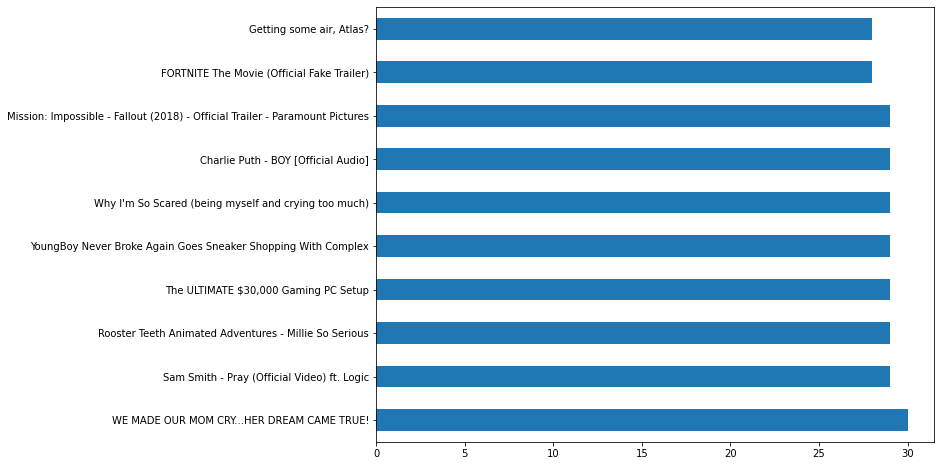

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
USvideos.title.value_counts()[:10].plot.barh(ax=ax)

El video que más tiempo ha estado en trending es WE MADE OUR CRY...HER DREAM CAME TRUE!

#### Columna "channel_title"

#### Conteo de valores unicos

In [33]:
USvideos.channel_title.nunique()

2207

#### Revisión de datos random 

In [34]:
USvideos.channel_title.sample(5, random_state=42)

15632          Atlantic Records
40759             BuzzFeedVideo
10536    The Graham Norton Show
11029       JuJu Smith-Schuster
8202                    Hevesh5
Name: channel_title, dtype: object

#### Número y porcentaje de valores perdidos

In [35]:
USvideos.channel_title.isna().sum()

0

In [36]:
USvideos.channel_title.isna().mean() * 100

0.0

#### Resumen de la columna

In [37]:
USvideos.channel_title.value_counts()

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
                                         ... 
Hin Nya                                     1
PK Inventor                                 1
Commercials Funny                           1
shoaib246                                   1
JanPaul123                                  1
Name: channel_title, Length: 2207, dtype: int64

#### Visualización de 10 de canales que más a veces aparecen en el data set

<AxesSubplot:>

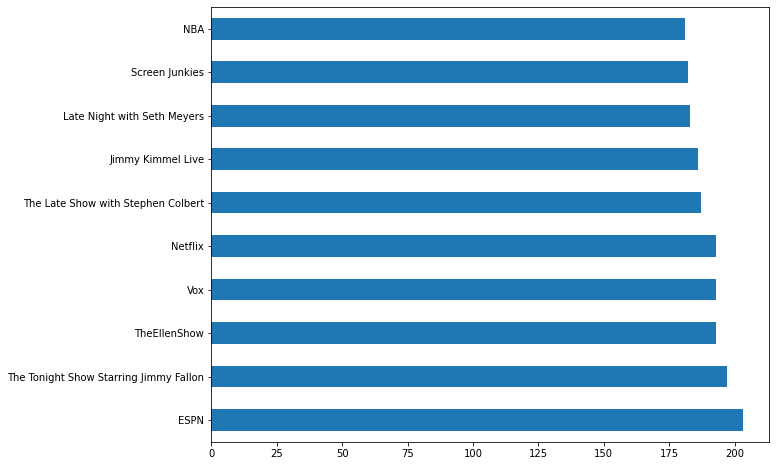

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
USvideos.channel_title.value_counts()[:10].plot.barh(ax=ax)

El canal que más tiempo ha estado en trending es ESPN

### Datos continuos

In [39]:
USvideos.select_dtypes("number")

,category_id,views,likes,dislikes,comment_count,id
0,22,748374,57527,2966,15954,22
1,24,2418783,97185,6146,12703,24
2,23,3191434,146033,5339,8181,23
3,24,343168,10172,666,2146,24
4,24,2095731,132235,1989,17518,24
...,...,...,...,...,...,...
40944,15,1685609,38160,1385,2657,15
40945,22,1064798,60008,382,3936,22
40946,24,1066451,48068,1032,3992,24
40947,1,5660813,192957,2846,13088,1


#### Columna "views"

#### Revisión de datos random 

In [40]:
USvideos.views.sample(5, random_state=42)

15632     206028
40759     402418
10536    1437372
11029     417790
8202      816662
Name: views, dtype: int32

#### Número y porcentaje de valores perdidos

In [41]:
USvideos.views.isna().sum()

0

In [42]:
USvideos.views.isna().mean() * 100

0.0

#### Resumen de la columna

In [43]:
USvideos.views.describe().apply("{0:1.1f}".format)

count        40949.0
mean       2360784.6
std        7394113.8
min            549.0
25%         242329.0
50%         681861.0
75%        1823157.0
max      225211923.0
Name: views, dtype: object

#### Columna "likes"

#### Revisión de datos random 

In [44]:
USvideos.likes.sample(5, random_state=42)

15632    21951
40759    10070
10536    33670
11029    13878
8202     16873
Name: likes, dtype: int32

#### Número y porcentaje de valores perdidos

In [45]:
USvideos.likes.isna().sum()

0

In [46]:
USvideos.likes.isna().mean() * 100

0.0

#### Resumen de la columna

In [47]:
USvideos.likes.describe().apply("{0:1.1f}".format)

count      40949.0
mean       74266.7
std       228885.3
min            0.0
25%         5424.0
50%        18091.0
75%        55417.0
max      5613827.0
Name: likes, dtype: object

#### Columna "dislikes"

#### Revisión de datos random 

In [48]:
USvideos.dislikes.sample(5, random_state=42)

15632     329
40759    3303
10536    1626
11029     346
8202      468
Name: dislikes, dtype: int32

#### Número y porcentaje de valores perdidos

In [49]:
USvideos.dislikes.isna().sum()

0

In [50]:
USvideos.dislikes.isna().mean() * 100

0.0

#### Resumen de la columna

In [51]:
USvideos.dislikes.describe().apply("{0:1.1f}".format)

count      40949.0
mean        3711.4
std        29029.7
min            0.0
25%          202.0
50%          631.0
75%         1938.0
max      1674420.0
Name: dislikes, dtype: object

#### Columna "comment_count"

#### Revisión de datos random 

In [52]:
USvideos.comment_count.sample(5, random_state=42)

15632    2951
40759    2142
10536    2233
11029    2000
8202     1038
Name: comment_count, dtype: int32

#### Número y porcentaje de valores perdidos

In [53]:
USvideos.comment_count.isna().sum()

0

In [54]:
USvideos.comment_count.isna().mean() * 100

0.0

#### Resumen de la columna

In [55]:
USvideos.comment_count.describe().apply("{0:1.1f}".format)

count      40949.0
mean        8446.8
std        37430.5
min            0.0
25%          614.0
50%         1856.0
75%         5755.0
max      1361580.0
Name: comment_count, dtype: object

### Datos Booleanos

#### Conteo y visualización de columna "comments_disabled" 

In [56]:
USvideos.comments_disabled.value_counts()

False    40316
True       633
Name: comments_disabled, dtype: int64

([<matplotlib.patches.Wedge at 0x1ac7b1dfcd0>,
 [Text(-1.337263058684218, -0.414400183251081, 'False'),
  Text(1.337263023522669, 0.414400296716845, 'True')],
 [Text(-1.1462254788721868, -0.35520015707235514, '98.5%'),
  Text(1.1462254487337165, 0.35520025432872426, '1.5%')])

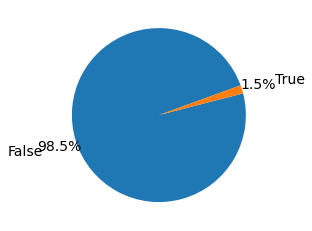

In [57]:
comments_disabled = USvideos['comments_disabled'].value_counts()
fig, ax = plt.subplots()
plt.rcParams['font.size']=14
plt.pie(comments_disabled, labels=comments_disabled.index, 
        autopct='%1.1f%%', startangle=20,
        pctdistance=1.2,labeldistance=1.4,)

#### Conteo y visualización de columna "ratings_disabled" 

In [58]:
USvideos.ratings_disabled.value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

([<matplotlib.patches.Wedge at 0x1ac7b4083d0>,
 [Text(-1.3216672230329956, -0.46173125469286763, 'False'),
  Text(1.3216672237084706, 0.46173125275937643, 'True')],
 [Text(-1.1328576197425677, -0.39576964687960087, '99.6%'),
  Text(1.1328576203215464, 0.39576964522232266, '0.4%')])

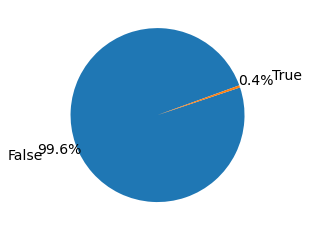

In [59]:
ratings_disabled= USvideos['ratings_disabled'].value_counts()
fig, ax = plt.subplots()
plt.rcParams['font.size']=14
plt.pie(ratings_disabled, labels=ratings_disabled.index, 
        autopct='%1.1f%%', startangle=20,
        pctdistance=1.2,labeldistance=1.4,)

### Cuantificar los datos faltantes en cada columna

In [60]:
miss_values_count = USvideos.isnull().sum(min_count=1)
miss_values_count

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
id                          0
category_name               0
dtype: int64

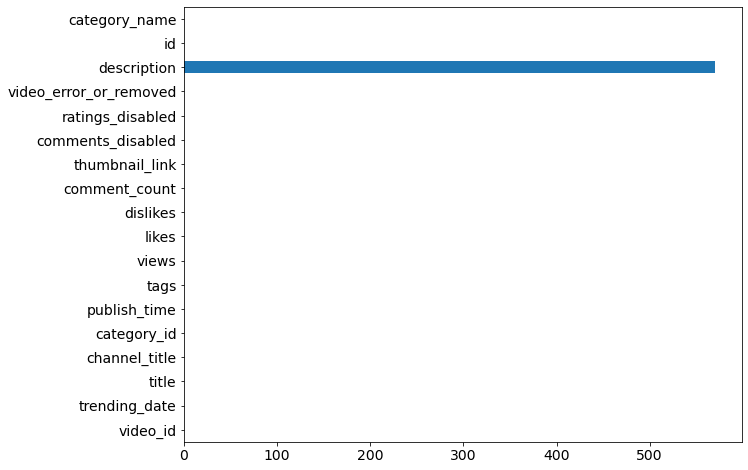

In [61]:
fig, ax = plt.subplots(figsize=(10, 8))
miss_values_count.plot.barh(ax=ax)
fig.savefig("miss_values_count-normalize-USvideos.png", dpi=300)

Existen videos que no tienen descripción

### Análisis de datos

### Comprobación de distribuciones en los datos

#### Histograma de los datos de views de todos los vídeos

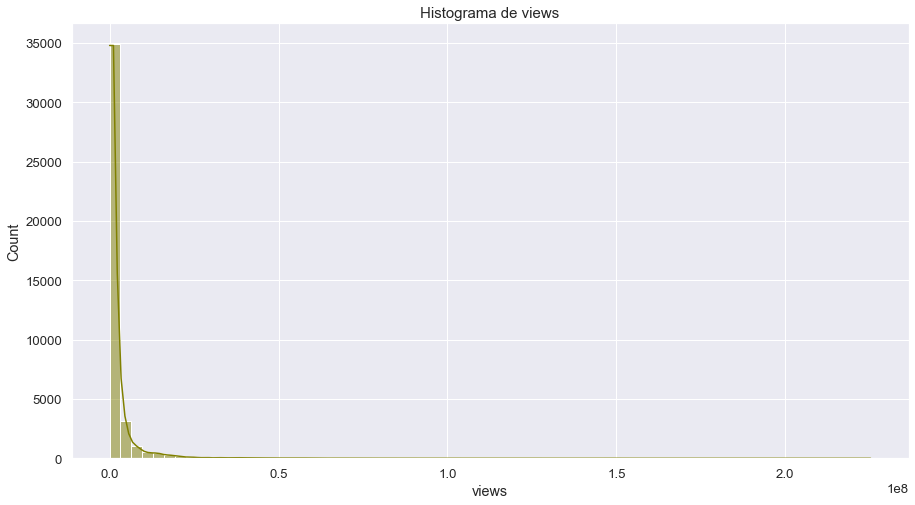

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.2)
sns.histplot(data=USvideos['views'], kde=True, color="olive", bins=70)
plt.title('Histograma de views', fontsize = 15)
plt.show()

La distribución está muy sesgada hacia la derecha y  muestra que la mayoría de los vídeos tienen vistas inferiores a 5 millones

#### Histograma de los datos de likes de todos los vídeos

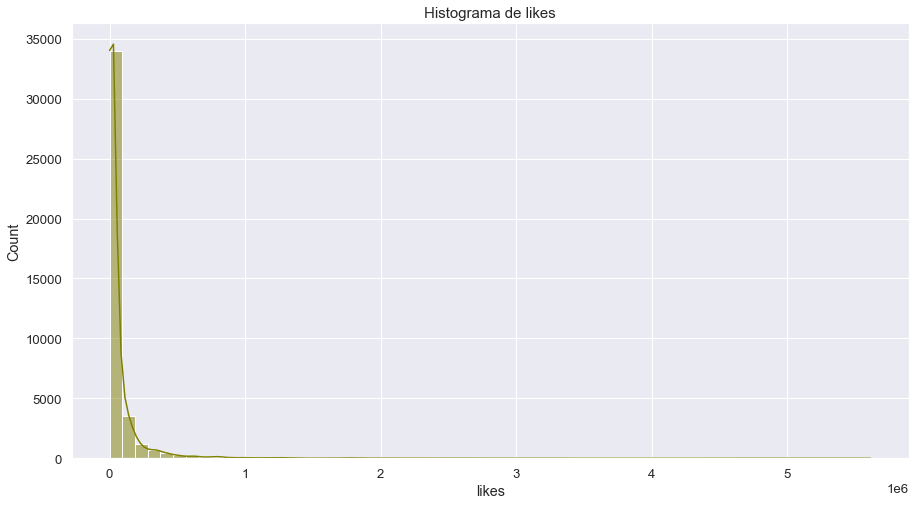

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.2)
sns.histplot(data=USvideos['likes'], kde=True, color="olive", bins=60)
plt.title('Histograma de likes', fontsize = 15)
plt.show()

 La distribución se inclina hacia la derecha y nos muestra que la mayoría de los vídeos tienen menos de 500.000 likes

#### Histograma de los datos de dislikes de todos los vídeos

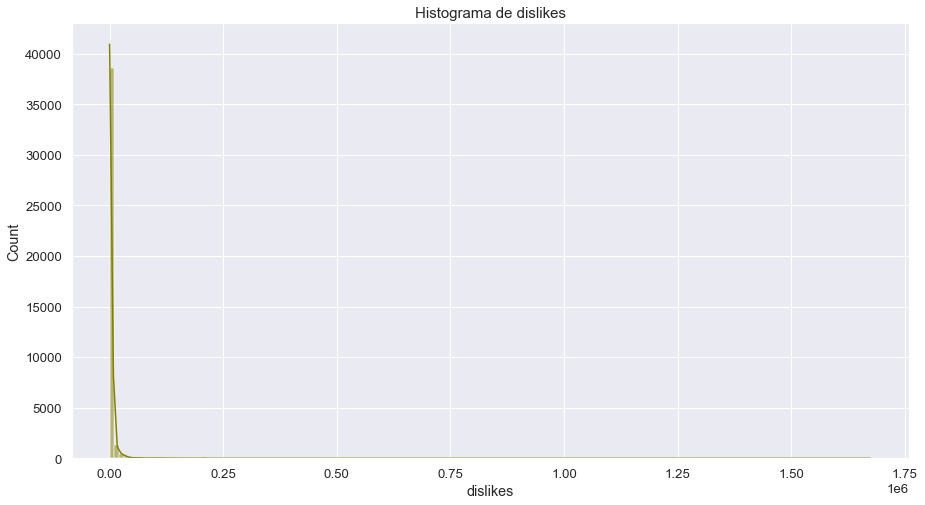

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.2)
sns.histplot(data=USvideos['dislikes'], color="olive",kde=True,bins=160)
plt.title('Histograma de dislikes', fontsize = 15)
plt.show()

La distribución se inclina hacia la derecha y nos muestra que la mayoría de los vídeos tienen menos de 83.000 dislikes aprox.

#### Histograma de los datos de comment_count de todos los vídeos

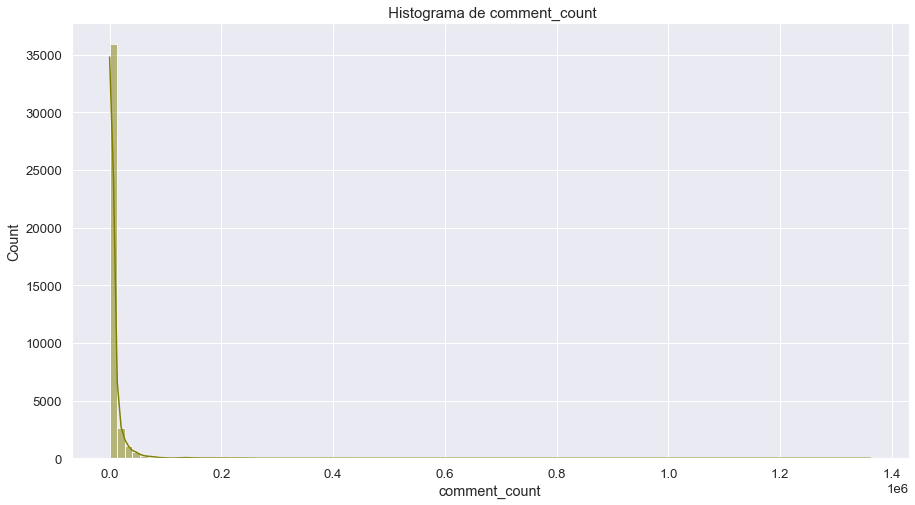

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.2)
sns.histplot(data=USvideos['comment_count'], kde=True, color="olive", bins=100)
plt.title(' Histograma de comment_count', fontsize = 15)
plt.show()

La distribución se inclina hacia la derecha y nos muestra que la mayoría de los vídeos tienen menos de 66.000 comentarios aprox.

#### Distribución de las categorías

In [73]:
(USvideos["category_name"].value_counts(ascending=False,normalize=True)*100).apply("{:0.2f}%".format)

Entertainment            24.33%
Music                    15.81%
Howto & Style            10.12%
Comedy                    8.44%
People & Blogs            7.84%
News & Politics           6.07%
Science & Technology      5.86%
Film & Animation          5.73%
Sports                    5.31%
Education                 4.04%
Pets & Animals            2.25%
Gaming                    2.00%
Travel & Events           0.98%
Autos & Vehicles          0.94%
Nonprofits & Activism     0.14%
Shows                     0.14%
Name: category_name, dtype: object

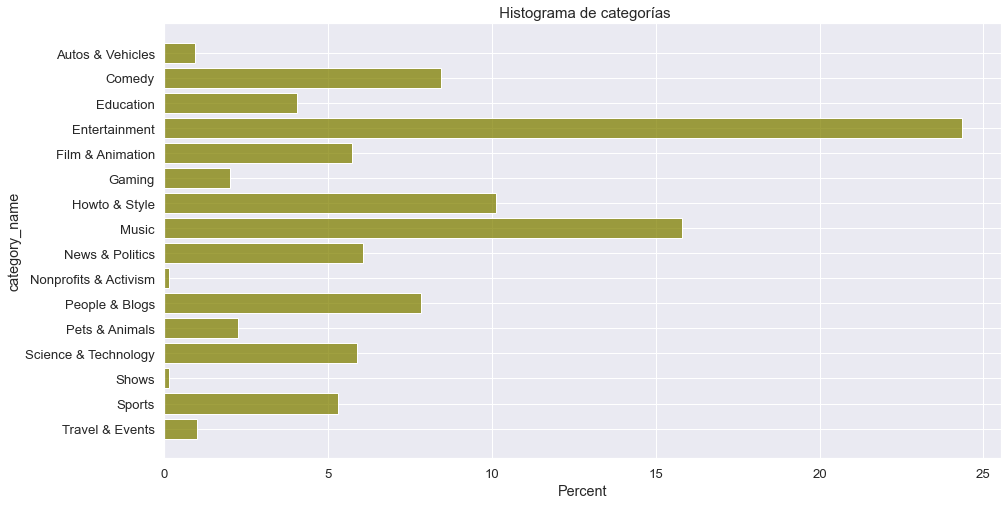

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.2)
sns.histplot(y=USvideos["category_name"], stat="percent", discrete=True, color="olive",shrink=.8)
plt.title(' Histograma de categorías', fontsize = 15)
plt.show()

La categoría Entertaiment representa un 24,33% de todos los vídeos 

#### Correlaciones entre los datos

#### views/likes

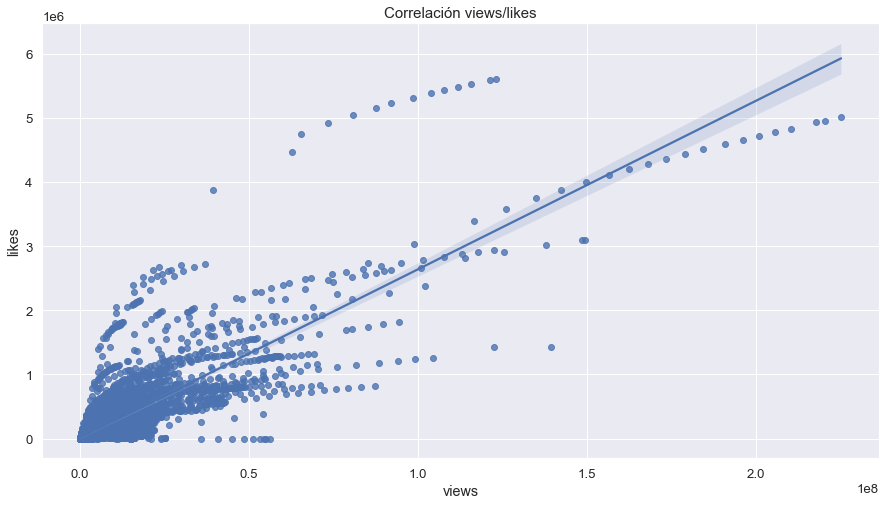

In [75]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.2)
sns.regplot(x=USvideos["views"], y=USvideos["likes"])
plt.title('Correlación views/likes', fontsize = 15)
plt.show()

Hay un grupo de puntos tendiendo hacia la derecha, su correlación no es fuerte, tal vez, entre más views, más likes, pero, no es seguro

#### views/dislikes

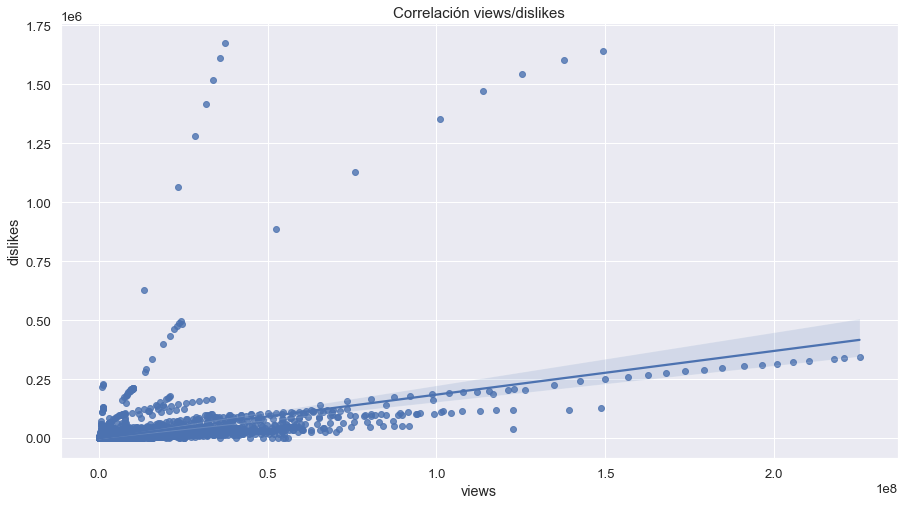

In [76]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.2)
sns.regplot(x=USvideos["views"], y=USvideos["dislikes"])
plt.title('Correlación views/dislikes', fontsize = 15)
plt.show()

Hay un grupo de puntos tendiendo hacia la derecha, tal vez, entre más views, más dislikes, pero, no es seguro

#### likes/dislikes

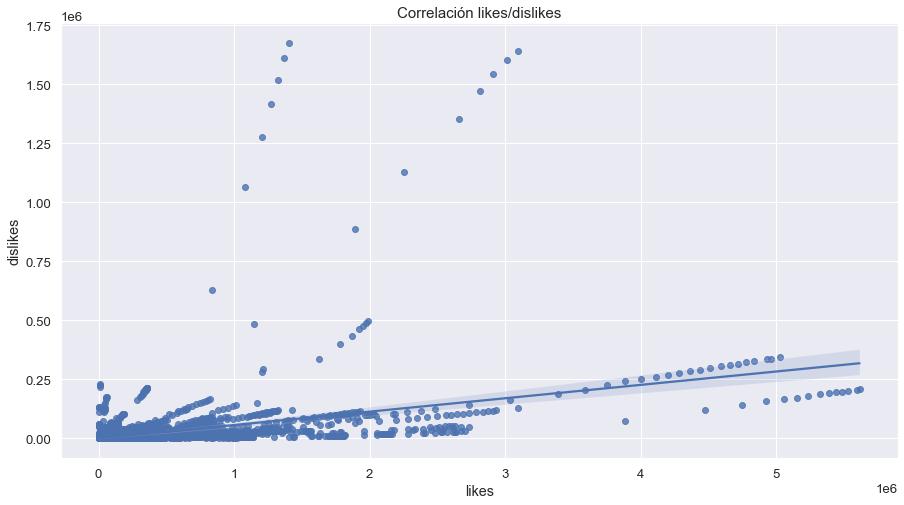

In [77]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.2)
sns.regplot(x=USvideos["likes"], y=USvideos["dislikes"])
plt.title('Correlación likes/dislikes', fontsize = 15)
plt.show()

No parece haber una correlación entre las variables

#### likes/comment_count

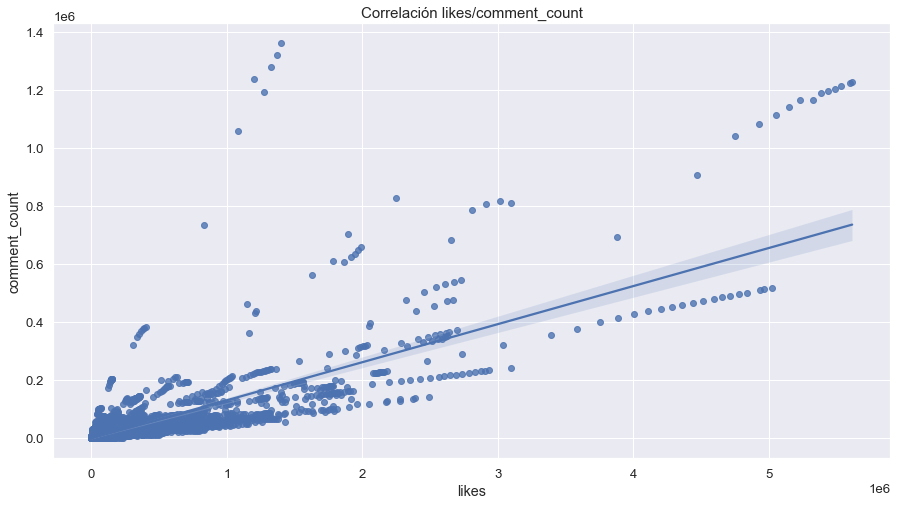

In [78]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.2)
sns.regplot(x=USvideos["likes"], y=USvideos["comment_count"])
plt.title('Correlación likes/comment_count', fontsize = 15)
plt.show()

Hay puntos tendiendo a hacia la derecha, parece una correlación muy débil entre las variables, tal vez, entre más likes más comentarios, pero, no es seguro

#### Dislikes/comment_count

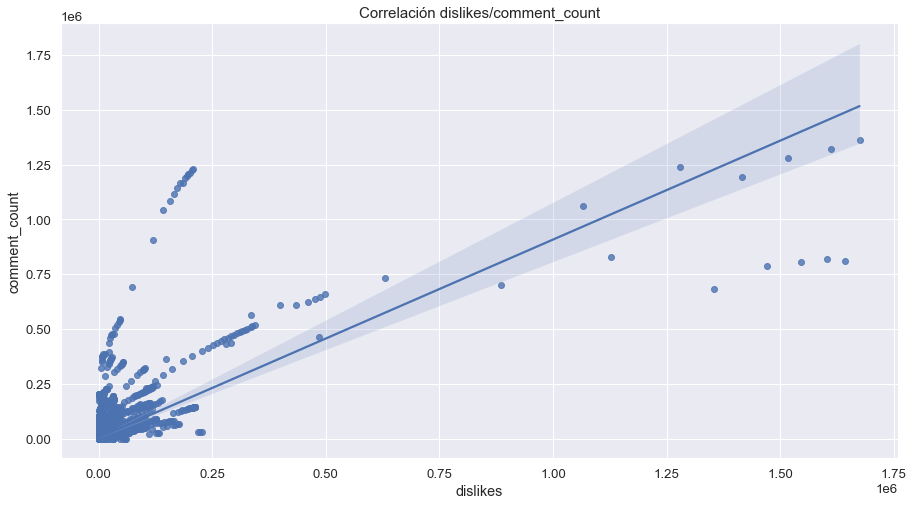

In [79]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.2)
sns.regplot(x=USvideos["dislikes"], y=USvideos["comment_count"])
plt.title('Correlación dislikes/comment_count', fontsize = 15)
plt.show()

Hay un grupo de puntos de datos en el origen, pero no parece haber una fuerte correlación entre las variables

#### views/comment_count

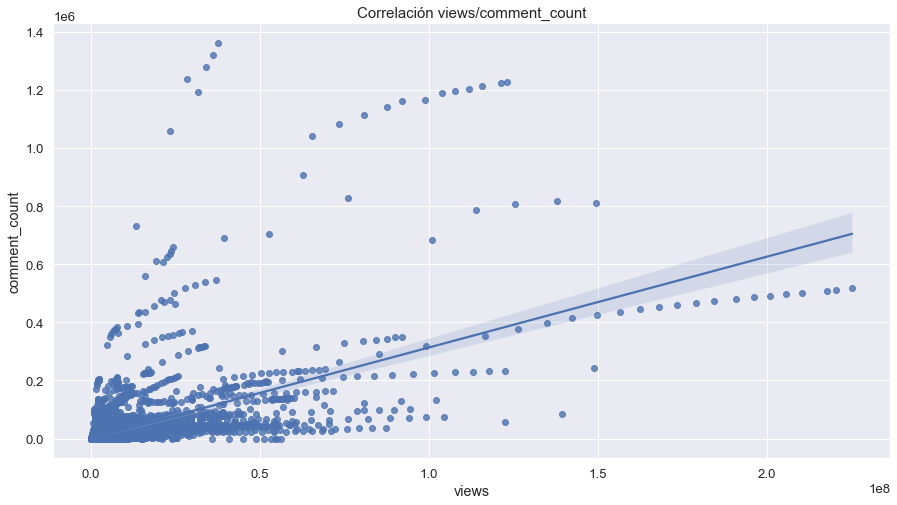

In [80]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 1.2)
sns.regplot(x=USvideos["views"], y=USvideos["comment_count"])
plt.title('Correlación views/comment_count', fontsize = 15)
plt.show()

Hay un grupo de puntos de datos tendiendo levemente a hacia la derecha, pero no parece haber una fuerte correlación entre las variables

#### Mapa de Calor de las variables likes, dislikes, comment_count y views

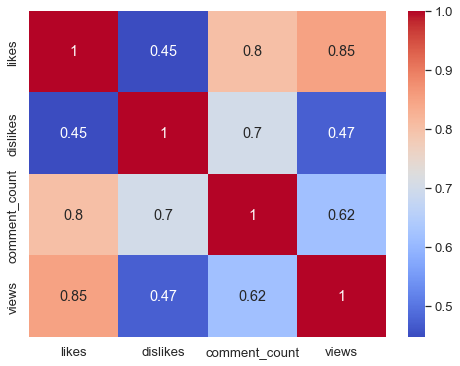

In [86]:
corr_matrix=USvideos[['likes', 'dislikes', 'comment_count','views']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

## Fase 3. Data Preparation

## Preprocessing

### Data Cleaning

#### Eliminación de columnas sin uso y repetidas

In [87]:
USvideos.drop(columns=["video_id","thumbnail_link","video_error_or_removed","id"], inplace=True, errors='ignore')

#### Resultado de data cleaning

In [88]:
USvideos

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,"One year after the presidential election, John...",Entertainment
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,I know it's been a while since we did this sho...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals
40945,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,False,False,NaN,People & Blogs
40946,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
40947,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation


#### Se transforman las categorías en valores 1, si corresponde el video a esa categoria y 0 si no corresponde. Se utiliza la función get_dummies

In [89]:
categories = pd.get_dummies(USvideos['category_name'])
USvideos = USvideos.join(categories)

#### Resultado de la transformación

In [90]:
USvideos

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,...,0,0,0,0,1,0,0,0,0,0
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,...,0,0,0,0,0,0,0,0,0,0
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,...,0,0,0,0,0,0,0,0,0,0
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,...,0,0,0,0,0,0,0,0,0,0
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,...,0,0,0,0,0,1,0,0,0,0
40945,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,...,0,0,0,0,1,0,0,0,0,0
40946,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,...,0,0,0,0,0,0,0,0,0,0
40947,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,...,0,0,0,0,0,0,0,0,0,0


## Fase 4. Modeling

#### Objetivo: Se quiere predecir si algún vídeo en tendencias llegará a tener gran popularidad, en otras palabras, si el vídeo se hará viral o no.

### Se necesita procesar más datos, se regresa a la Fase 3

#### Se tomarán como vídeos de gran popularidad, los vídeos con número de vistas que pertenecen al cuartil 3 (75%), que corresponden a vídeos con un mayor número de vistas

In [91]:
quantile = USvideos.views.describe()['75%']
quantile

1823157.0

#### Los vídeos son categorizados por popularidad en forma binaria (0 y 1), según el cuartil 3

In [92]:
views_popular = pd.DataFrame(USvideos.views.apply(lambda x: 1 if x > quantile else 0))
views_popular.columns = ['views_popular']
USvideos = pd.concat([USvideos, views_popular], axis = 1)

#### Se extraen los días de publicación de los vídeos y se mapean según los días de la semana

In [93]:
USvideos['publish_time'] = pd.to_datetime(USvideos['publish_time'])
USvideos['publish_day_of_Week'] = USvideos['publish_time'].apply(lambda time: time.dayofweek)
week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
USvideos['publish_day_of_Week'] = USvideos['publish_day_of_Week'].map(week_map)

#### Se extraen las horas de publicación de los vídeos

In [94]:
USvideos.trending_date = pd.to_datetime(USvideos.trending_date, format = '%y.%d.%m')
USvideos.publish_time = pd.to_datetime(USvideos.publish_time)
USvideos['publish_hour'] = USvideos.publish_time.dt.hour

#### Estado de Dataframe

In [95]:
USvideos.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events,views_popular,publish_day_of_Week,publish_hour
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,...,0,1,0,0,0,0,0,0,Monday,17
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,...,0,0,0,0,0,0,0,1,Monday,7
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,...,0,0,0,0,0,0,0,1,Sunday,19
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,...,0,0,0,0,0,0,0,0,Monday,11
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,...,0,0,0,0,0,0,0,1,Sunday,18


#### Vídeos solo Tendencia vs Muy Popular

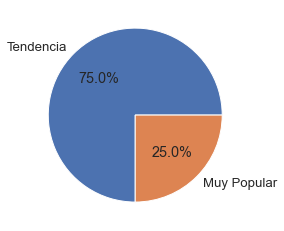

In [96]:
value_counts = USvideos["views_popular"].value_counts().to_dict()
fig, ax = plt.subplots()
graph = ax.pie([value_counts[0], value_counts[1]], labels=['Tendencia', 'Muy Popular'],autopct='%1.1f%%')

#### Día de publicación y número de vídeos subidos

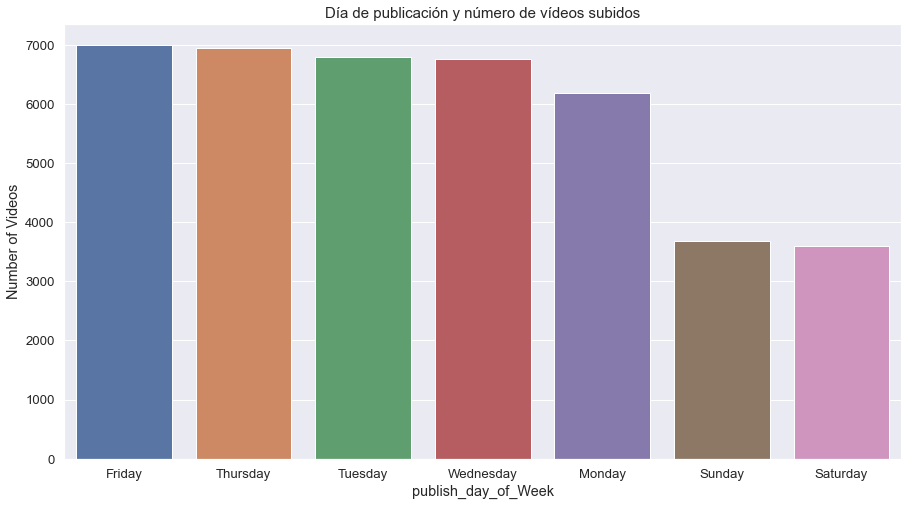

In [99]:
import seaborn as sns
sns.set(font_scale = 1.2)
cdf = USvideos["publish_day_of_Week"].value_counts().to_frame().reset_index().rename(columns={"index": "publish_day_of_Week", "publish_day_of_Week": "No_of_videos"})
fig, ax = plt.subplots()
sns.barplot(x="publish_day_of_Week", y="No_of_videos", data=cdf, ax=ax)
ax.set(xlabel="publish_day_of_Week", ylabel="Number of Videos")
plt.title('Día de publicación y número de vídeos subidos', fontsize = 15)
fig.set_size_inches(15, 8)

#### Hora de publicación y número de vídeos subidos

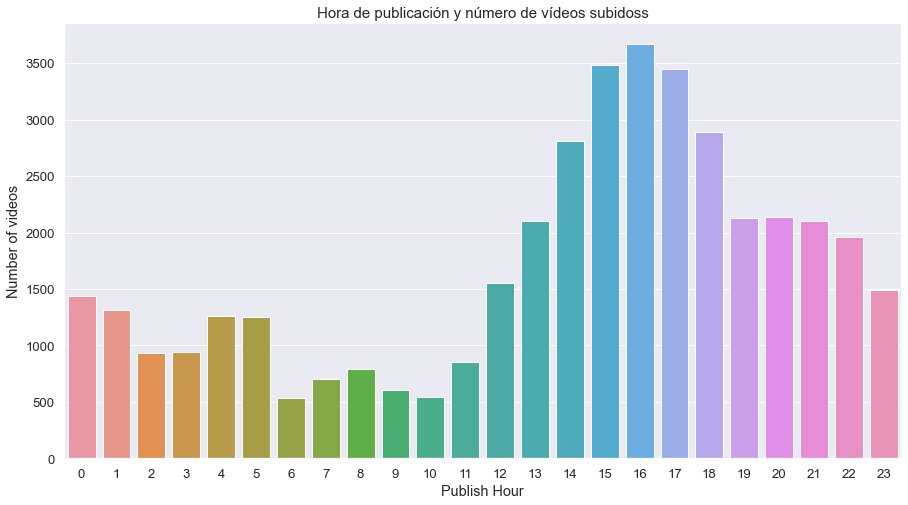

In [100]:
cdf = USvideos["publish_hour"].value_counts().to_frame().reset_index().rename(columns={"index": "publish_hour", "publish_hour": "No_of_videos"})
fig, ax = plt.subplots()
sns.barplot(x="publish_hour", y="No_of_videos", data=cdf, ax=ax)
ax.set(xlabel="Publish Hour", ylabel="Number of videos")
plt.title('Hora de publicación y número de vídeos subidoss', fontsize = 15)
fig.set_size_inches(15, 8)


#### Se transforma el dia de la semana en 0 y 1 a través de get_dummies

In [101]:
week_day = pd.get_dummies(USvideos.publish_day_of_Week)
USvideos = pd.concat([USvideos, week_day], axis = 1)

#### Se eliminan las columnas que no se utilizarán

In [102]:
df_clean=USvideos.drop(['views', 'trending_date', 'title', 'channel_title', 'category_id','tags', 'likes', 'dislikes', 'comment_count', 'description','category_name','publish_day_of_Week','publish_time'], axis = 1)
USvideos=df_clean
USvideos

,comments_disabled,ratings_disabled,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,...,Travel & Events,views_popular,publish_hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,False,False,0,0,0,0,0,0,0,0,...,0,0,17,0,1,0,0,0,0,0
1,False,False,0,0,0,1,0,0,0,0,...,0,1,7,0,1,0,0,0,0,0
2,False,False,0,1,0,0,0,0,0,0,...,0,1,19,0,0,0,1,0,0,0
3,False,False,0,0,0,1,0,0,0,0,...,0,0,11,0,1,0,0,0,0,0
4,False,False,0,0,0,1,0,0,0,0,...,0,1,18,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,False,False,0,0,0,0,0,0,0,0,...,0,0,13,1,0,0,0,0,0,0
40945,False,False,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
40946,False,False,0,0,0,1,0,0,0,0,...,0,0,17,1,0,0,0,0,0,0
40947,False,False,0,0,0,0,1,0,0,0,...,0,1,17,0,0,0,0,1,0,0


In [103]:
USvideos.columns

Index(['comments_disabled', 'ratings_disabled', 'Autos & Vehicles', 'Comedy',
       'Education', 'Entertainment', 'Film & Animation', 'Gaming',
       'Howto & Style', 'Music', 'News & Politics', 'Nonprofits & Activism',
       'People & Blogs', 'Pets & Animals', 'Science & Technology', 'Shows',
       'Sports', 'Travel & Events', 'views_popular', 'publish_hour', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Comienza Modeling

#### Se dividen los datos en un conjuntos de training y testing

In [104]:
X = USvideos.drop(['views_popular'], axis = 1)
Y = USvideos.views_popular

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70,test_size=0.30,random_state=0)

#### Se importan los clasificadores, métricas y visualizaciones a utilizar

#### Clasificadores
- Logistic Regression: clasificador de propósito general más utilizado, muy escalable y puede ser muy rápido de entrenar.
- Decision Tree: algoritmo que admite características tanto numéricas como categóricas. Genera modelos predictivos con alta precisión, estabilidad y facilidad de interpretación.
- Random Forest: clasificador más popular para datos densos. Fácil de implementar. Necesita muchas pasadas por los datos. 

#### Métricas
- Precision: utilizada para poder saber qué porcentaje de valores que se han clasificado como positivos son realmente positivos. Precision = TP / (TP + FP). (¿Qué porcentaje de las predicciones positivas fueron correctas?)
- Recall: utilizada para saber cuantos valores positivos son correctamente clasificados. Recall = TP / (TP + FN) (¿Qué porcentaje de casos positivos se identificó correctamente?)
- F1-Score:  Esta métrica combina el precision y el recall, para obtener un valor mucho más objetivo. (¿Qué tan bueno es mi modelo?)
- Kappa: métrica para conocer el rendimiento del clasificador, especialmente en conjuntos de datos desequilibrados


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [130]:
 #listas para guardar datos de las métricas
metricsModelDefault_list=[]
metricsModelHyperP_list=[]
kappaModelDefault_list=[]
kappaModelHyperP_list=[]

#### Funciones para realizar los entrenamientos, predicciones y estadísticas

In [131]:
#función para entrenar, predecir y mostrar las estadísticas de las métricas en los distintos modelos con y sin hiperparámetros
def functionModelsAction(model, modelName, hyperParameters):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    clf_report = classification_report(Y_test, Y_pred, output_dict=True, zero_division=0)
    cf_matrix = confusion_matrix(Y_test, Y_pred)
    heatmapCfMatrix(cf_matrix, modelName)
    ReportClassification(clf_report, modelName) 
    print(classification_report(Y_test, Y_pred, zero_division=0))
    cohen_score = cohen_kappa_score(Y_test, Y_pred)
    print('Cohen score: '+str(cohen_score))
    if(hyperParameters):
        metricsModelHyperP_list.append(precision_recall_fscore_support(Y_test, Y_pred,average='binary',zero_division=0))
        kappaModelHyperP_list.append(cohen_score)
    else:
        metricsModelDefault_list.append(precision_recall_fscore_support(Y_test, Y_pred,average='binary',zero_division=0))
        kappaModelDefault_list.append(cohen_score)

In [132]:
#funcion para mostrar el reporte de las métricas mediante un mapa de calor
def ReportClassification(clf_report, modelName):
    df = pd.DataFrame(clf_report).iloc[:-1, :2].T
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.heatmap(df, annot=True)
    plt.title('Reporte de Clasificación para modelo '+modelName)
    plt.show()

In [133]:
#funcion para mostrar la matriz de confusión mediante un mapa de calor
def heatmapCfMatrix(cf_matrix, modelName):
    ax= plt.subplot()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Matriz de Confusión para modelo '+modelName); 
    

#### Creación de los modelos

In [134]:
lr = LogisticRegression(solver='liblinear')
dt = DecisionTreeClassifier(random_state=1024)
rf = RandomForestClassifier(n_estimators=10)

### Parámetros por defecto

#### Resultados de métricas de modelo con Logistic Regression

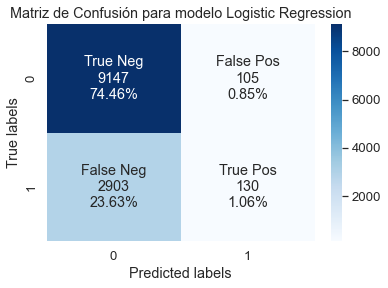

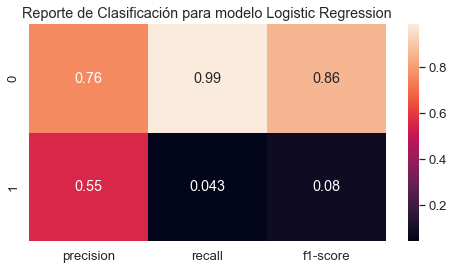

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      9252
           1       0.55      0.04      0.08      3033

    accuracy                           0.76     12285
   macro avg       0.66      0.52      0.47     12285
weighted avg       0.71      0.76      0.67     12285

Cohen score: 0.045674188772391267


In [112]:
functionModelsAction(lr, 'Logistic Regression',False)

#### Resultados de métricas de modelo con Decision Tree 

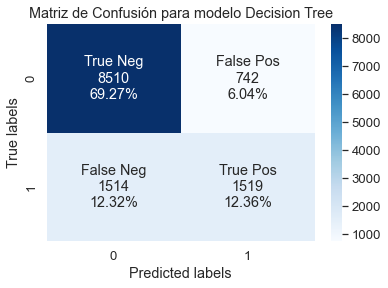

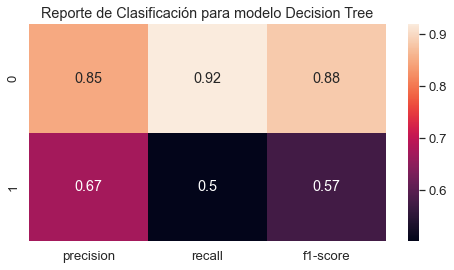

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      9252
           1       0.67      0.50      0.57      3033

    accuracy                           0.82     12285
   macro avg       0.76      0.71      0.73     12285
weighted avg       0.81      0.82      0.81     12285

Cohen score: 0.4599743686688893


In [113]:
functionModelsAction(dt, 'Decision Tree',False)

#### Resultados de métricas de modelo con Random Forest

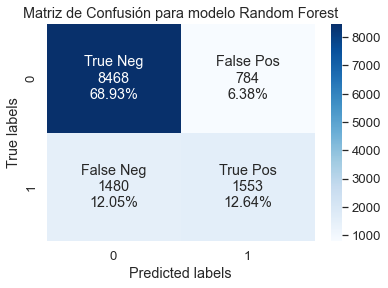

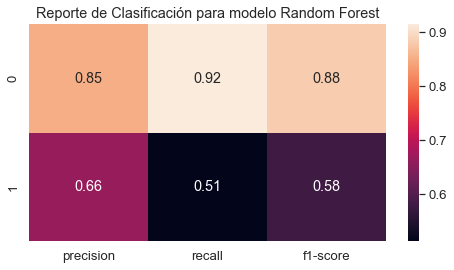

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      9252
           1       0.66      0.51      0.58      3033

    accuracy                           0.82     12285
   macro avg       0.76      0.71      0.73     12285
weighted avg       0.81      0.82      0.81     12285

Cohen score: 0.4630048209251506


In [114]:
functionModelsAction(rf, 'Random Forest',False)

#### Dataframe de métricas y modelos 

In [115]:
metrics = ['precision','recall', 'f1-score']
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
df=pd.DataFrame(metricsModelDefault_list,index = classifiers)
df= df.iloc[:, :-1]
df.columns = metrics
dfMetricsDefault=df
dfMetricsDefault

,precision,recall,f1-score
Logistic Regression,0.553191,0.042862,0.079559
Decision Tree,0.671827,0.500824,0.573857
Random Forest,0.664527,0.512034,0.578399


In [116]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
dfk=pd.DataFrame(kappaModelDefault_list,index = classifiers)
dfk.columns = ['Kappa score']
dfk

,Kappa score
Logistic Regression,0.045674
Decision Tree,0.459974
Random Forest,0.463005


#### Comparación de los modelos y sus métricas

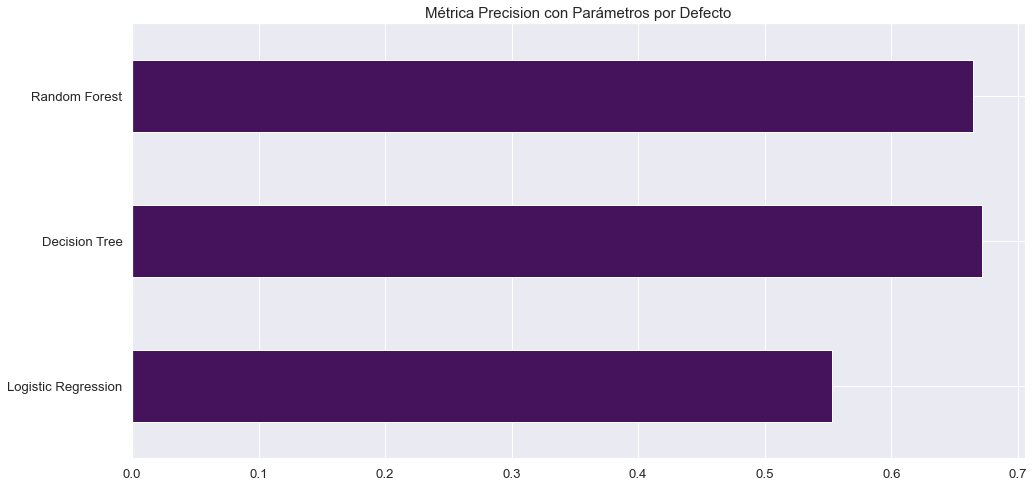

In [117]:
metricsDefaultGraph = dfMetricsDefault['precision']
fig = plt.figure()
metricsDefaultGraph.plot.barh(rot=0, figsize=(16,8), color='#45135c')
plt.title('Métrica Precision con Parámetros por Defecto', fontsize = 15)
plt.show()

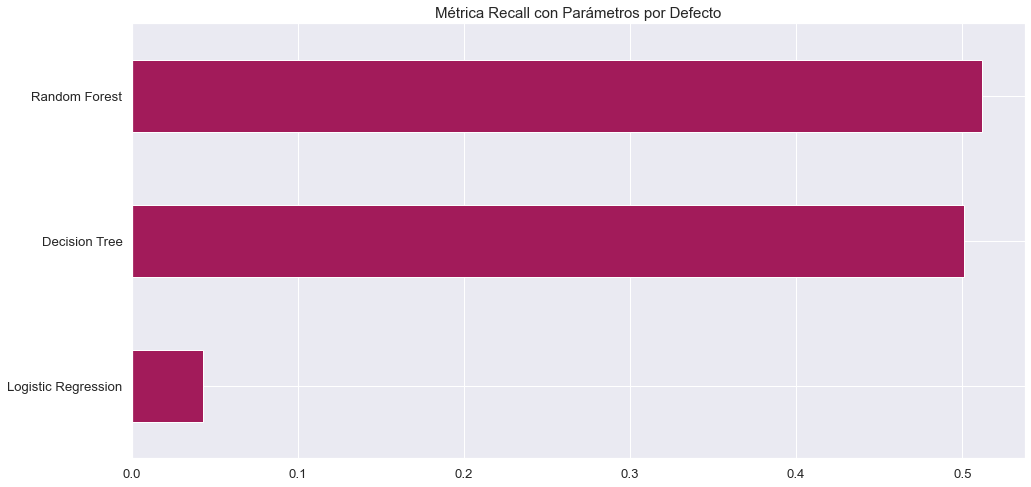

In [118]:
metricsDefaultGraph = dfMetricsDefault['recall']
fig = plt.figure()
metricsDefaultGraph.plot.barh(rot=0, figsize=(16,8),color='#a21b5a')
plt.title('Métrica Recall con Parámetros por Defecto', fontsize = 15)
plt.show()

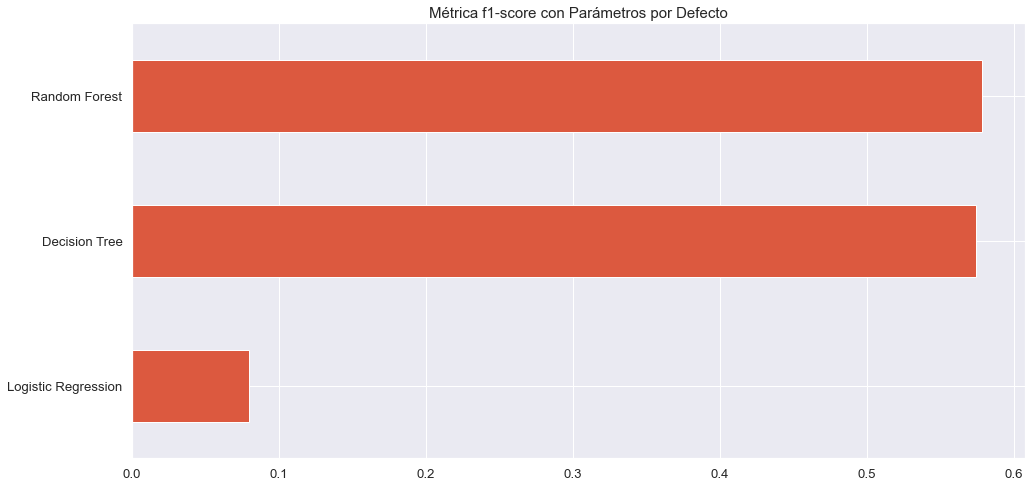

In [119]:
metricsDefaultGraph = dfMetricsDefault['f1-score']
fig = plt.figure()
metricsDefaultGraph.plot.barh(rot=0, figsize=(16,8), color='#dc593f')
plt.title('Métrica f1-score con Parámetros por Defecto', fontsize = 15)
plt.show()

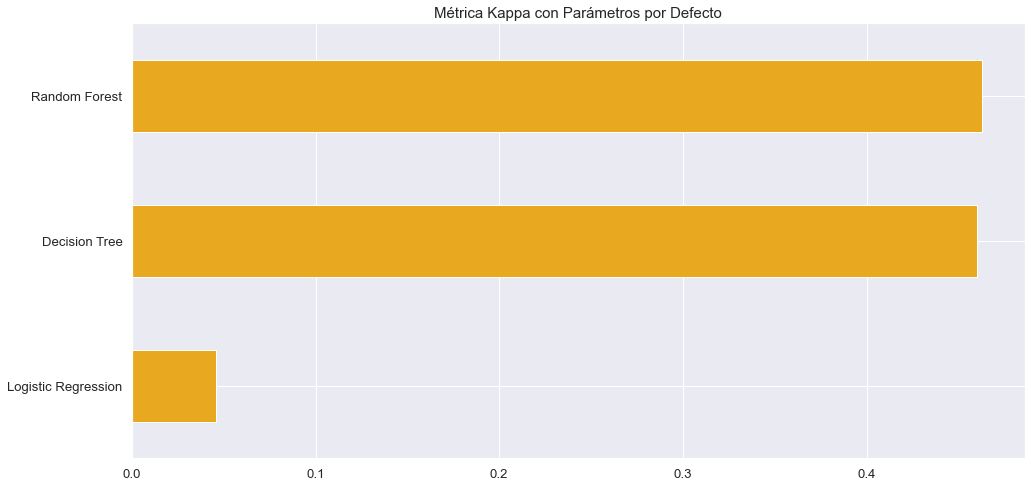

In [120]:
metricsDefaultGraph = dfk['Kappa score']
fig = plt.figure()
metricsDefaultGraph.plot.barh(rot=0, figsize=(16,8), color='#e8a81f')
plt.title('Métrica Kappa con Parámetros por Defecto', fontsize = 15)
plt.show()

### Hiper-parámetros

Primero se proporciona una lista de opciones de parámetros y luego, se utiliza GridSearch para seleccionar los mejores parámetros. GridSearch es apropiada para búsquedas pequeñas y rápidas de valores de hiper-parámetros que se sabe que funcionan bien en general.

In [135]:
#función para utilizar GridSearch 
#luego utiliza la función functionModelsAction para realizar las demás acciones (fit, predict, métricas)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
def functionGridSearchCV(model, grid, ModelName, HyperP):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    grid_search = GridSearchCV(estimator=model, 
                  param_grid=grid, n_jobs=-1, cv=cv,  
                  scoring='precision',error_score=0)
    functionModelsAction(grid_search,ModelName,HyperP)

#### Resultados de métricas de modelo con Logistic Regression

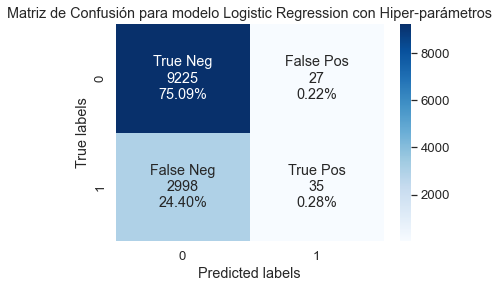

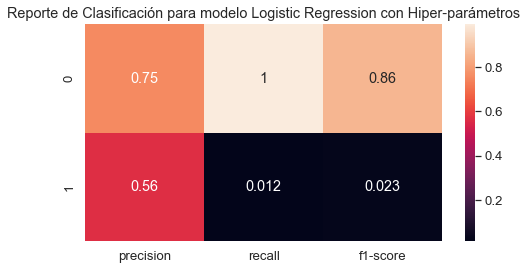

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      9252
           1       0.56      0.01      0.02      3033

    accuracy                           0.75     12285
   macro avg       0.66      0.50      0.44     12285
weighted avg       0.71      0.75      0.65     12285

Cohen score: 0.012852845415140202


In [136]:
#Logistic Regression
lr_grid={"C":np.logspace(-3,3,7), 
         "penalty":["l1","l2"],
        'max_iter' : [100, 1000,2500, 5000]}
functionGridSearchCV(lr, lr_grid,'Logistic Regression con Hiper-parámetros',True)

#### Resultados de métricas de modelo DecisionTree

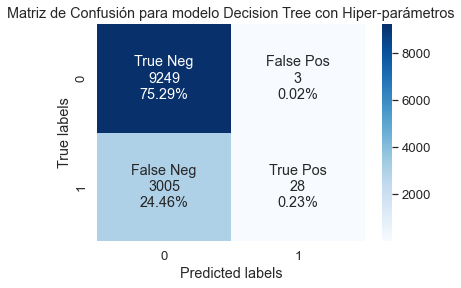

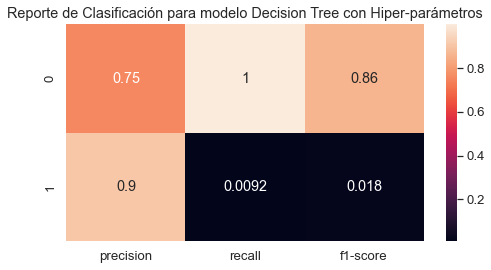

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      9252
           1       0.90      0.01      0.02      3033

    accuracy                           0.76     12285
   macro avg       0.83      0.50      0.44     12285
weighted avg       0.79      0.76      0.65     12285

Cohen score: 0.013347700065313495


In [137]:
#DecisionTree
dt_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
functionGridSearchCV(dt, dt_grid,'Decision Tree con Hiper-parámetros',True)

#### Resultados de métricas de modelo RandomForest

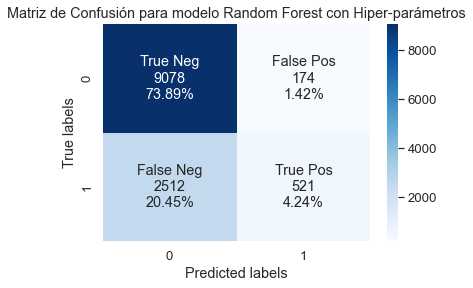

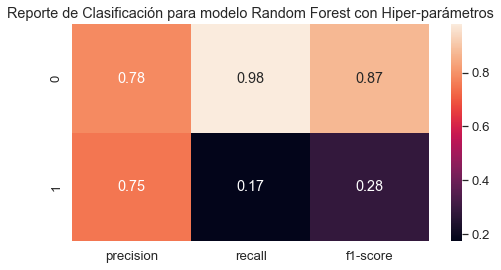

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      9252
           1       0.75      0.17      0.28      3033

    accuracy                           0.78     12285
   macro avg       0.77      0.58      0.58     12285
weighted avg       0.77      0.78      0.73     12285

Cohen score: 0.2064589019303983


In [138]:
#RandomForest
rf_grid = {'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
functionGridSearchCV(rf, rf_grid,'Random Forest con Hiper-parámetros',True)

In [140]:
metrics = ['precision','recall', 'f1-score']
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
df=pd.DataFrame(metricsModelHyperP_list,index = classifiers,)
df= df.iloc[:, :-1]
df.columns = metrics
dfMetricsHyperP=df
dfMetricsHyperP

,precision,recall,f1-score
Logistic Regression,0.564516,0.011540,0.022617
Decision Tree,0.903226,0.009232,0.018277
Random Forest,0.749640,0.171777,0.279506


#### Dataframe de métricas y modelos 

In [141]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
dfkh=pd.DataFrame(kappaModelHyperP_list,index = classifiers)
dfkh.columns = ['Kappa score']
dfkh

,Kappa score
Logistic Regression,0.012853
Decision Tree,0.013348
Random Forest,0.206459


#### Comparación de los modelos y sus métricas

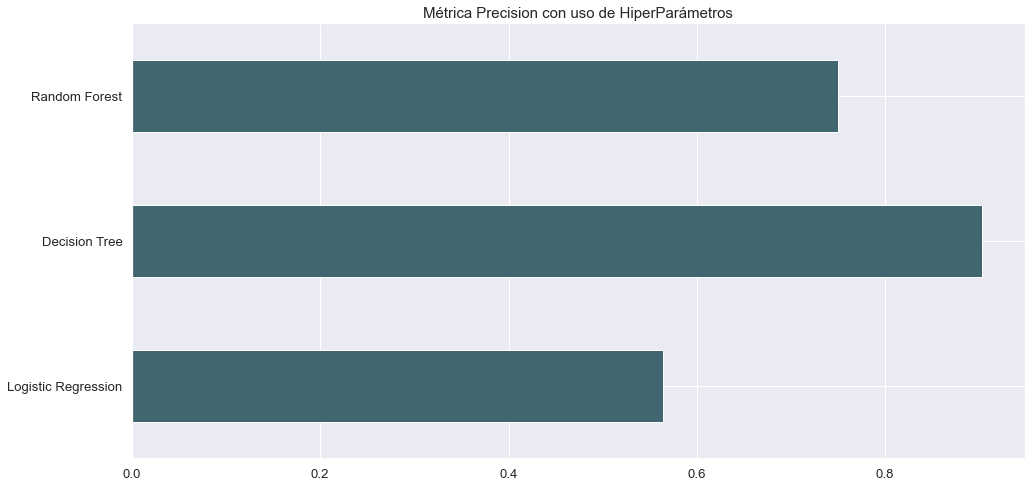

In [143]:
metricsHyperPGraph = dfMetricsHyperP['precision']
fig = plt.figure()
metricsHyperPGraph.plot.barh(rot=0, figsize=(16,8), color='#416670')
plt.title('Métrica Precision con uso de HiperParámetros', fontsize = 15)
plt.show()

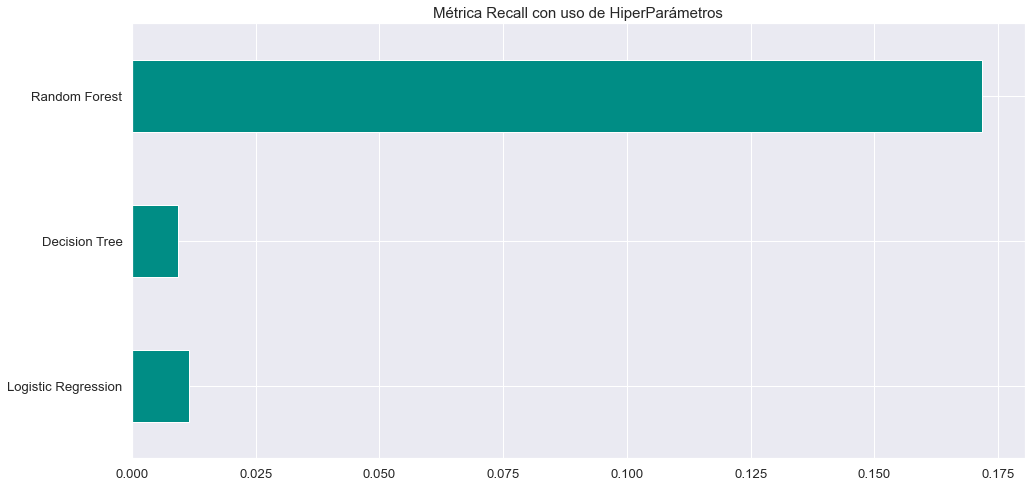

In [144]:
metricsHyperPGraph = dfMetricsHyperP['recall']
fig = plt.figure()
metricsHyperPGraph.plot.barh(rot=0, figsize=(16,8), color='#008d85')
plt.title('Métrica Recall con uso de HiperParámetros', fontsize = 15)
plt.show()

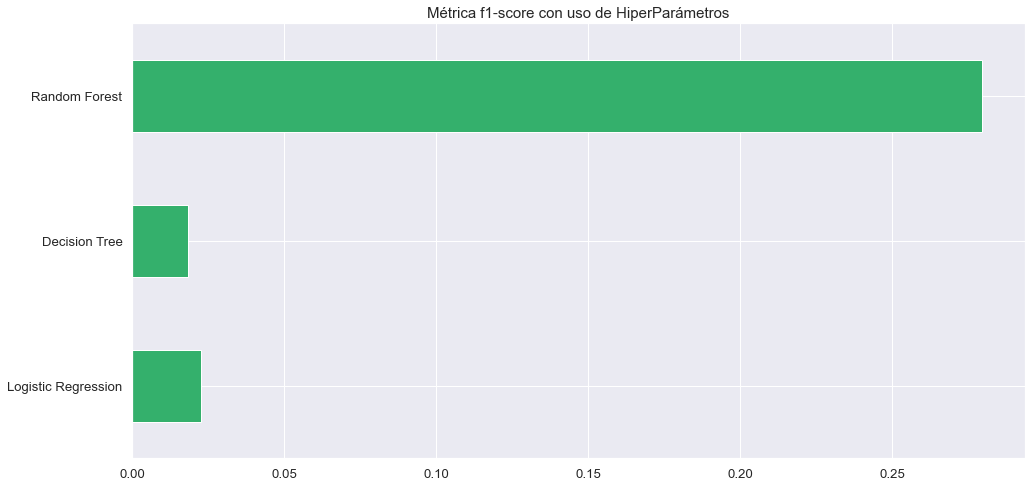

In [145]:
metricsHyperPGraph = dfMetricsHyperP['f1-score']
fig = plt.figure()
metricsHyperPGraph.plot.barh(rot=0, figsize=(16,8), color='#34b06c')
plt.title('Métrica f1-score con uso de HiperParámetros', fontsize = 15)
plt.show()

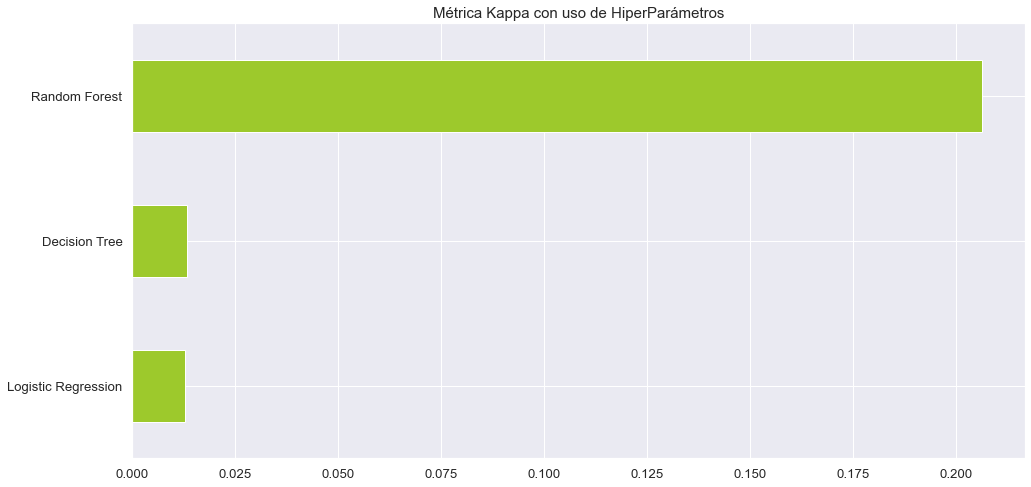

In [148]:
metricsHyperPGraph = dfkh['Kappa score']
fig = plt.figure()
metricsHyperPGraph.plot.barh(rot=0, figsize=(16,8), color='#9dc92c')
plt.title('Métrica Kappa con uso de HiperParámetros', fontsize = 15)
plt.show()

### Comparación de los modelos con y sin hiper-parámetros entre sus métricas 

In [149]:
dfConcat=pd.concat([dfMetricsDefault, dfMetricsHyperP], axis=1)
dfConcat.columns = ['precision-default', 'recall-default', 'f1-score-default','precision-HyperParameters', 'recall-HyperParameters', 'f1-score-HyperParameters']
precisionCompare=dfConcat[['precision-default','precision-HyperParameters']]
recallCompare=dfConcat[['recall-default','recall-HyperParameters']]
f1Compare=dfConcat[['f1-score-default','f1-score-HyperParameters']]

#### Métrica Precision

In [150]:
precisionCompare

,precision-default,precision-HyperParameters
Logistic Regression,0.553191,0.564516
Decision Tree,0.671827,0.903226
Random Forest,0.664527,0.749640


<Figure size 432x288 with 0 Axes>

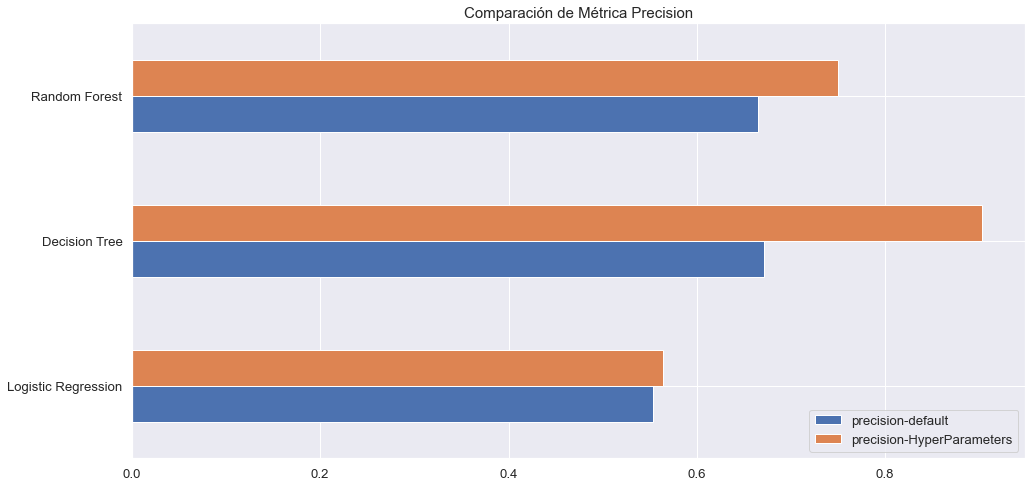

In [151]:
metricsGraphPrecision = precisionCompare
fig = plt.figure()
metricsGraphPrecision.plot.barh(rot=0, figsize=(16,8))
plt.title('Comparación de Métrica Precision', fontsize = 15)
plt.show()

#### Métrica Recall

In [152]:
recallCompare

,recall-default,recall-HyperParameters
Logistic Regression,0.042862,0.011540
Decision Tree,0.500824,0.009232
Random Forest,0.512034,0.171777


<Figure size 432x288 with 0 Axes>

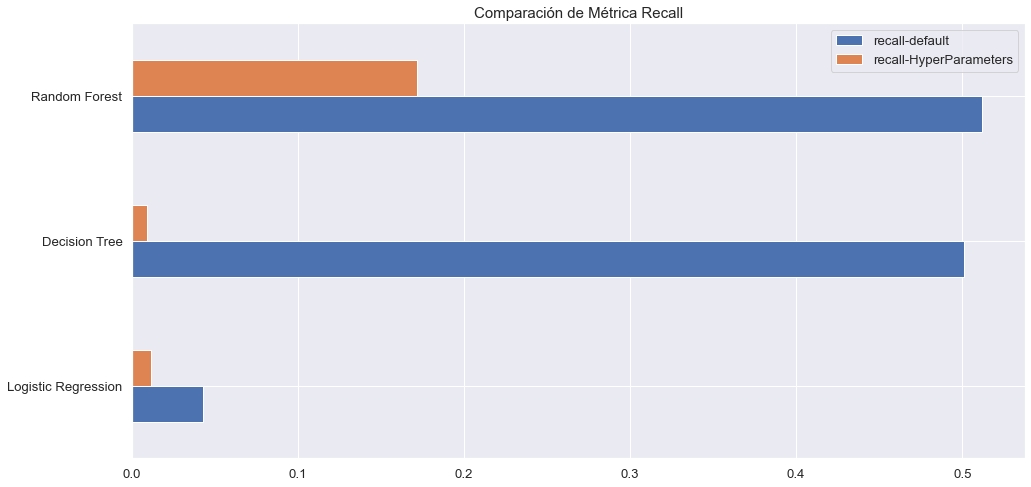

In [153]:
metricsGraphRecall = recallCompare
fig = plt.figure()
metricsGraphRecall.plot.barh(rot=0, figsize=(16,8))
plt.title('Comparación de Métrica Recall', fontsize = 15)
plt.show()

#### Métrica F1-Score

In [154]:
f1Compare

,f1-score-default,f1-score-HyperParameters
Logistic Regression,0.079559,0.022617
Decision Tree,0.573857,0.018277
Random Forest,0.578399,0.279506


<Figure size 432x288 with 0 Axes>

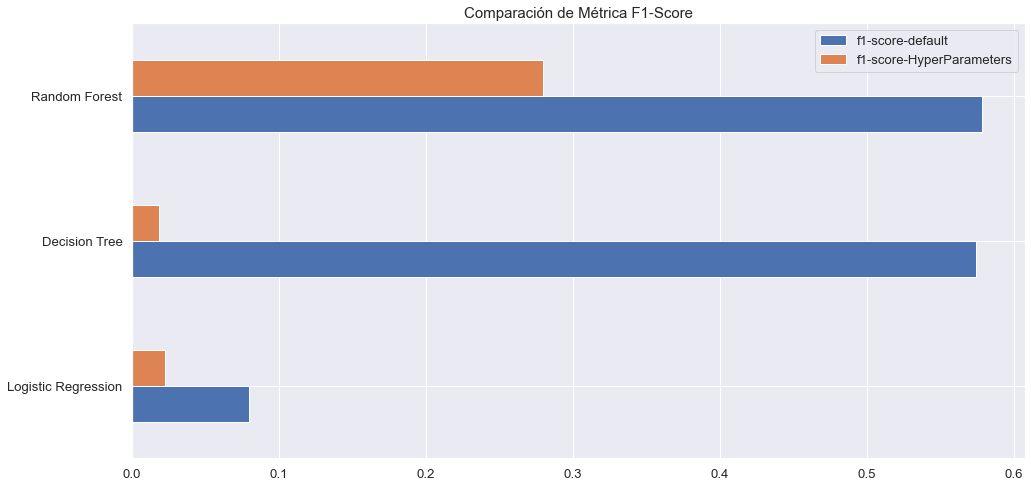

In [155]:
metricsGraphf1 = f1Compare
fig = plt.figure()
metricsGraphf1.plot.barh(rot=0, figsize=(16,8))
plt.title('Comparación de Métrica F1-Score', fontsize = 15)
plt.show()

#### Métrica Kappa

In [158]:
dfConcatKappa=pd.concat([dfk, dfkh], axis=1)
dfConcatKappa.columns = ['kappa-default','kappa-HyperParameters']
dfConcatKappa

,kappa-default,kappa-HyperParameters
Logistic Regression,0.045674,0.012853
Decision Tree,0.459974,0.013348
Random Forest,0.463005,0.206459


<Figure size 432x288 with 0 Axes>

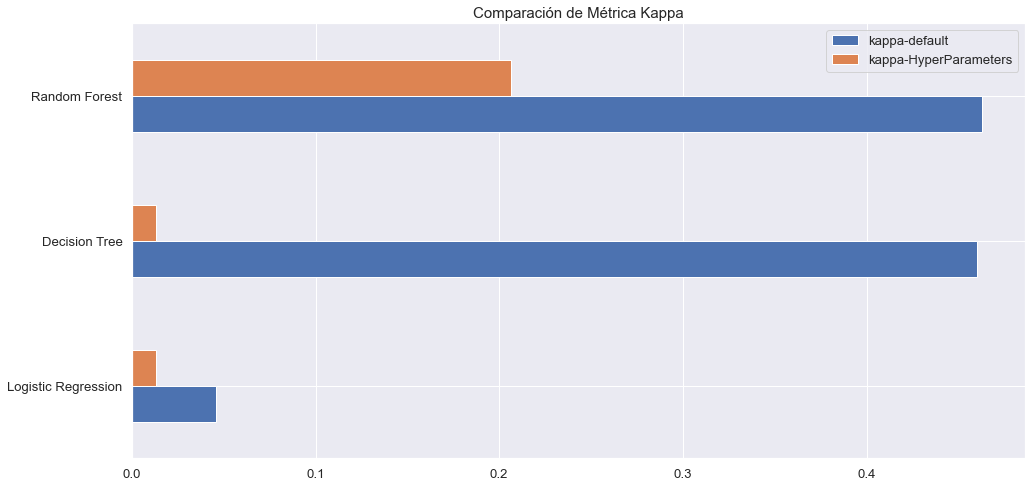

In [159]:
metricsGraphKappa = dfConcatKappa
fig = plt.figure()
metricsGraphKappa.plot.barh(rot=0, figsize=(16,8))
plt.title('Comparación de Métrica Kappa', fontsize = 15)
plt.show()

#### Conclusiones

- Los algoritmos Decision Tree y Random Forest tienen métricas similares cuando no se utilizan hiper-parámetros
- Logistic Regression no es buen clasificador para este problema
- Al utilizar los hiper-parámetros teniendo como métrica de calidad 'precision', la métrica precision aumenta en todos los modelos, pero disminuyen considerablemente las métricas de recall y f1-score
- Se ve más prometedor para este problema el clasificador Decision Tree sin utilizar hiper-parámetros según sus métricas 
- Utilizando hiper-parámetros, se ve más prometedor Random Forest, pero sus resultados no son muy confiables
- Las clases están desbalanceadas, existe un número pequeño de videos que son "muy populares" en comparación a los videos restantes.
- Faltaría analizar más datos, como por ejemplo los títulos y los tags para encontrar palabras claves o para realizar un análisis de sentimientos

Extra
- La métrica Kappa muestra que Random Forest es mejor, pero aún así, no rinde lo suficiente
- Con los datos y los modelos, aún no es posible predecir con exactitud los vídeos más vistos